# Circle $\mathbb{S}^1$

This notebook demonstrates some differential geometry capabilities of SageMath on the example of the 1-dimensional sphere, i.e. the circle. The corresponding tools have been developed within
the [SageManifolds](https://sagemanifolds.obspm.fr) project.

In [1]:
%display latex

In [2]:
S1 = Manifold(1, 'S^1', latex_name=r'\mathbb{S}^1')
print(S1)

1-dimensional differentiable manifold S^1


In [3]:
S1

1-dimensional differentiable manifold S^1

In [4]:
A = S1.open_subset('A')
B = S1.open_subset('B')

In [5]:
S1.declare_union(A, B)

In [6]:
CA.<ph> = A.chart(r"ph:(0,2*pi):\varphi")
CA

Chart (A, (ph,))

In [7]:
CA.coord_range()

ph: (0, 2*pi)

In [8]:
CB.<ps> = B.chart(r"ps:(0,2*pi):\psi")
CB

Chart (B, (ps,))

In [9]:
CA_to_CB = CA.transition_map(CB, (ph + pi*(1 - 2*heaviside(ph - pi)),),
                             intersection_name='W',
                             restrictions1= ph!=pi, 
                             restrictions2= ps!=pi)
CA_to_CB.display()

ps = -pi*(2*heaviside(-pi + ph) - 1) + ph

In [10]:
CA_to_CB(ph)[0]

pi - 2*pi*heaviside(-pi + ph) + ph

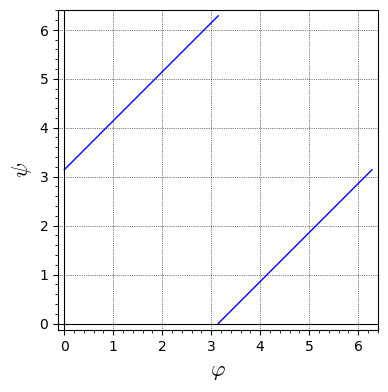

In [11]:
plot(CA_to_CB(ph)[0], (ph, 0, pi), 
     axes_labels=[r'$\varphi$', r'$\psi$'], 
     frame=True, gridlines=True, aspect_ratio=1) \
+ plot(CA_to_CB(ph)[0], (ph, pi, 2*pi))

In [12]:
CA_to_CB.set_inverse(ps + pi*(1 - 2*heaviside(ps - pi)))

Check of the inverse coordinate transformation:
  ph == 2*pi - 2*pi*heaviside(-pi + ph) - 2*pi*heaviside(-2*pi*heaviside(-pi + ph) + ph) + ph  **failed**
  ps == 2*pi - 2*pi*heaviside(-pi + ps) - 2*pi*heaviside(-2*pi*heaviside(-pi + ps) + ps) + ps  **failed**
NB: a failed report can reflect a mere lack of simplification.


In [13]:
S1.atlas()

[Chart (A, (ph,)), Chart (B, (ps,)), Chart (W, (ph,)), Chart (W, (ps,))]

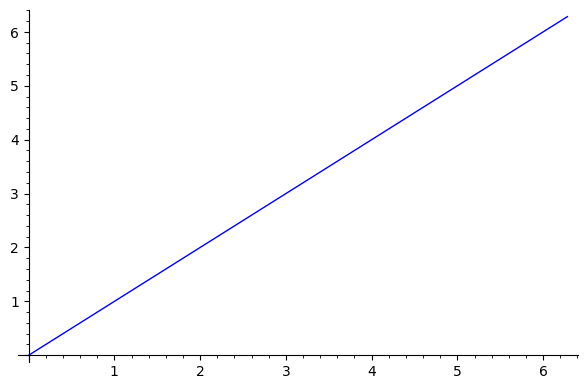

In [14]:
plot(2*pi - 2*pi*heaviside(-pi + ph) - 2*pi*heaviside(-2*pi*heaviside(-pi + ph) + ph) + ph, 
     (ph, 0, 2*pi))

In [15]:
R2.<X,Y> = EuclideanSpace(name='R^2', latex_name=r'\mathbb{R}^2', metric_name='h')
cartesian = R2.cartesian_coordinates()
cartesian

Chart (R^2, (X, Y))

In [16]:
Phi = S1.diff_map(R2, {(CA, cartesian): (cos(ph), sin(ph)),
                       (CB, cartesian): (-cos(ps), -sin(ps))},
                  name='Phi', latex_name=r'\Phi')
Phi.display()

Phi: S^1 → R^2
on A: ph ↦ (X, Y) = (cos(ph), sin(ph))
on B: ps ↦ (X, Y) = (-cos(ps), -sin(ps))

In [17]:
O = S1((pi,), chart=CB, name='O')
O

Point O on the 1-dimensional differentiable manifold S^1

In [18]:
cartesian(Phi(O))

(1, 0)

In [19]:
H = S1((pi,), chart=CA, name='H')
cartesian(Phi(H))

(-1, 0)

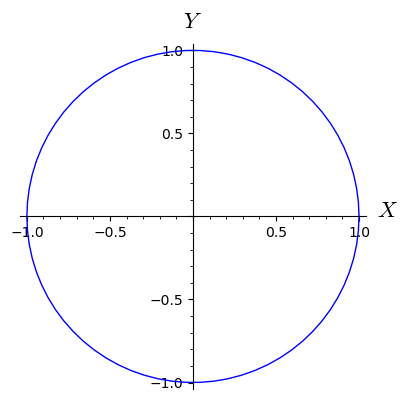

In [20]:
graph_spher = CA.plot(chart=cartesian, mapping=Phi, number_values=11, 
                      color='blue')
graph_spher

In [21]:
e = S1.vector_frame('e')

In [22]:
e.restrict(A)[0][0] = 1
e.restrict(A)[0].display()

e_0 = ∂/∂ph

In [23]:
A.set_change_of_frame(CA.frame(), e.restrict(A), 
                      A.tangent_identity_field())

In [24]:
e.restrict(B)[0][0] = 1
e.restrict(B)[0].display()

e_0 = ∂/∂ps

In [25]:
B.set_change_of_frame(CB.frame(), e.restrict(B), 
                      B.tangent_identity_field())

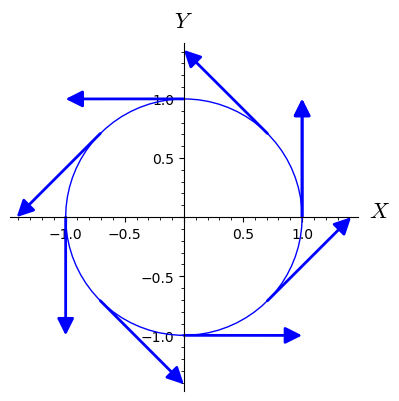

In [26]:
graph_spher + e[0].plot(cartesian, mapping=Phi)

In [27]:
S1.is_manifestly_parallelizable()

True

In [28]:
f = S1.one_form(name='f')
f[0] = 1
print(f)
f.display()

1-form f on the 1-dimensional differentiable manifold S^1


f = e^0

In [29]:
f == e.coframe()[0]

True

The 1-form $f$ is closed (as any 1-form on a 1-dimensional manifold) but is not exact:

In [30]:
f.restrict(A).display()

f = dph

In [31]:
f.restrict(B).display()

f = dps

In [32]:
df = diff(f.restrict(A))
df.display()

df = 0

In [33]:
diff(f.restrict(B)).display()

df = 0